In [1]:
import pandas as pd
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import sys, os
import warnings
warnings.simplefilter(action='ignore')

In [2]:
import fbprophet
import pmdarima as pm
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [3]:
import seaborn as sns
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import tree

In [4]:
df = pd.read_csv('DataML2.csv')

In [5]:
df['period'] = pd.to_datetime(df['period'], format='%b-%y')
df

,period,gdprl,csplrl,csprl,cslrl,csgrl,invrl,xgsrl,mgsrl,inhrl,...,goog_groc,goog_parks,goog_transit,goog_work,goog_res,goog_avg,IPBK,IPAMM,ITP,IIK
0,2012-01-01,6.110087,5.780286,5.547299,6.200196,7.742390,6.986212,6.842575,11.053824,5.456052,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-02-01,6.110087,5.780286,5.547299,6.200196,7.742390,6.986212,6.842575,11.053824,5.456052,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012-03-01,6.110087,5.780286,5.547299,6.200196,7.742390,6.986212,6.842575,11.053824,5.456052,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012-04-01,6.207811,6.967163,5.511730,6.871508,16.776838,10.131111,1.713118,15.426255,6.618118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012-05-01,6.207811,6.967163,5.511730,6.871508,16.776838,10.131111,1.713118,15.426255,6.618118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,2020-09-01,-3.485374,-4.001398,-4.046090,-1.967292,9.759699,-6.479756,-11.657055,-23.003171,-5.600000,...,-2.333333,-10.366667,-36.000000,-18.866667,11.766667,-12.188889,37.466078,27.929502,32.982781,29.337052
105,2020-10-01,-2.194768,-3.582511,-3.614345,-2.138715,1.757572,-6.151957,-7.211662,-13.517052,-6.633814,...,0.064516,-7.645161,-32.193548,-23.000000,9.774194,-11.833333,40.786587,34.514693,34.757150,31.410465
106,2020-11-01,-2.194768,-3.582511,-3.614345,-2.138715,1.757572,-6.151957,-7.211662,-13.517052,-6.633814,...,-0.466667,-12.666667,-29.300000,-20.966667,7.300000,-12.066667,43.031193,35.586534,38.456308,28.422419
107,2020-12-01,-2.194768,-3.582511,-3.614345,-2.138715,1.757572,-6.151957,-7.211662,-13.517052,-6.633814,...,4.225806,-6.548387,-25.580645,-24.677419,9.935484,-9.478495,45.322294,38.623498,41.747653,32.130951


In [6]:
df.dtypes

period      datetime64[ns]
gdprl              float64
csplrl             float64
csprl              float64
cslrl              float64
                 ...      
goog_avg           float64
IPBK               float64
IPAMM              float64
ITP                float64
IIK                float64
Length: 79, dtype: object

In [7]:
df.index = df['period']
df.index.name = None
df = df.drop(columns=['period'])
df

,gdprl,csplrl,csprl,cslrl,csgrl,invrl,xgsrl,mgsrl,inhrl,inbrl,...,goog_groc,goog_parks,goog_transit,goog_work,goog_res,goog_avg,IPBK,IPAMM,ITP,IIK
2012-01-01,6.110087,5.780286,5.547299,6.200196,7.742390,6.986212,6.842575,11.053824,5.456052,11.224086,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-02-01,6.110087,5.780286,5.547299,6.200196,7.742390,6.986212,6.842575,11.053824,5.456052,11.224086,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-03-01,6.110087,5.780286,5.547299,6.200196,7.742390,6.986212,6.842575,11.053824,5.456052,11.224086,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-04-01,6.207811,6.967163,5.511730,6.871508,16.776838,10.131111,1.713118,15.426255,6.618118,19.656792,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-01,6.207811,6.967163,5.511730,6.871508,16.776838,10.131111,1.713118,15.426255,6.618118,19.656792,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-01,-3.485374,-4.001398,-4.046090,-1.967292,9.759699,-6.479756,-11.657055,-23.003171,-5.600000,-8.989116,...,-2.333333,-10.366667,-36.000000,-18.866667,11.766667,-12.188889,37.466078,27.929502,32.982781,29.337052
2020-10-01,-2.194768,-3.582511,-3.614345,-2.138715,1.757572,-6.151957,-7.211662,-13.517052,-6.633814,-4.708003,...,0.064516,-7.645161,-32.193548,-23.000000,9.774194,-11.833333,40.786587,34.514693,34.757150,31.410465
2020-11-01,-2.194768,-3.582511,-3.614345,-2.138715,1.757572,-6.151957,-7.211662,-13.517052,-6.633814,-4.708003,...,-0.466667,-12.666667,-29.300000,-20.966667,7.300000,-12.066667,43.031193,35.586534,38.456308,28.422419
2020-12-01,-2.194768,-3.582511,-3.614345,-2.138715,1.757572,-6.151957,-7.211662,-13.517052,-6.633814,-4.708003,...,4.225806,-6.548387,-25.580645,-24.677419,9.935484,-9.478495,45.322294,38.623498,41.747653,32.130951


In [8]:
df.index.name='period'
df

,gdprl,csplrl,csprl,cslrl,csgrl,invrl,xgsrl,mgsrl,inhrl,inbrl,...,goog_groc,goog_parks,goog_transit,goog_work,goog_res,goog_avg,IPBK,IPAMM,ITP,IIK
period,,,,,,,,,,,,,,,,,,,,,
2012-01-01,6.110087,5.780286,5.547299,6.200196,7.742390,6.986212,6.842575,11.053824,5.456052,11.224086,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-02-01,6.110087,5.780286,5.547299,6.200196,7.742390,6.986212,6.842575,11.053824,5.456052,11.224086,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-03-01,6.110087,5.780286,5.547299,6.200196,7.742390,6.986212,6.842575,11.053824,5.456052,11.224086,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-04-01,6.207811,6.967163,5.511730,6.871508,16.776838,10.131111,1.713118,15.426255,6.618118,19.656792,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-01,6.207811,6.967163,5.511730,6.871508,16.776838,10.131111,1.713118,15.426255,6.618118,19.656792,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-01,-3.485374,-4.001398,-4.046090,-1.967292,9.759699,-6.479756,-11.657055,-23.003171,-5.600000,-8.989116,...,-2.333333,-10.366667,-36.000000,-18.866667,11.766667,-12.188889,37.466078,27.929502,32.982781,29.337052
2020-10-01,-2.194768,-3.582511,-3.614345,-2.138715,1.757572,-6.151957,-7.211662,-13.517052,-6.633814,-4.708003,...,0.064516,-7.645161,-32.193548,-23.000000,9.774194,-11.833333,40.786587,34.514693,34.757150,31.410465
2020-11-01,-2.194768,-3.582511,-3.614345,-2.138715,1.757572,-6.151957,-7.211662,-13.517052,-6.633814,-4.708003,...,-0.466667,-12.666667,-29.300000,-20.966667,7.300000,-12.066667,43.031193,35.586534,38.456308,28.422419


In [10]:
data = df.drop(columns=['csplrl','csprl','cslrl','csgrl','invrl','xgsrl','mgsrl','inhrl','inbrl','retailsales','sukucadang','manminrok','bbm','gadget','perlengkapanrt','baranglain','onlinesales','onlinetranspr','motorsales','konsumsiskn','tariktunai','belanjadebet','tariktunaicc','ntp','wageburuh','wageart','wagebarber','wagetukang','ihsg','yield1y','IHPRsekunder','DPKindividu','KreditKonsumsi','JobVacancy','IEK','jalantolgol1','inflasipendidikan','inflasikesehatan','devisa_transpor','devisa_travel','semensales','imporkonstruksi','orderbook','voltraffgol3','voltraffgol5','presalesprop','pmi','salesalatberat','kredit_mk','kredit_inv','voltraffgol4','rtgs','ekspor_nm_rl','impor_nm_rl','ekspor_nm_pi','impor_nm_pi','ekspor_mg_nl','impor_mg_nl','sup_valas_jl','sup_valas_bl','goog_retail','goog_groc','goog_parks','goog_transit','goog_work','goog_res','goog_avg','IPBK','IPAMM','ITP','IIK'])

In [12]:
data = data.pct_change(periods=12)[['barangbudaya','barangsandang','mobilsales','IKK','IKE','prod_motor']]
data

,barangbudaya,barangsandang,mobilsales,IKK,IKE,prod_motor
period,,,,,,
2012-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2012-02-01,NaN,NaN,NaN,NaN,NaN,NaN
2012-03-01,NaN,NaN,NaN,NaN,NaN,NaN
2012-04-01,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-01,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2020-09-01,-0.395327,-0.597071,-0.478895,-0.315828,-0.496362,-0.507490
2020-10-01,-0.405610,-0.580669,-0.490076,-0.332618,-0.508702,-0.460201
2020-11-01,-0.403419,-0.566365,-0.409974,-0.259111,-0.449609,-0.359217


In [13]:
gdprl = df.loc['2013-01-01':, 'gdprl']

In [14]:
data['gdprl'] = gdprl
data = data.dropna()
data

,barangbudaya,barangsandang,mobilsales,IKK,IKE,prod_motor,gdprl
period,,,,,,,
2013-01-01,-0.031166,0.034690,0.265155,-0.025030,-0.023058,0.284257,5.540871
2013-02-01,-0.061437,0.135979,0.194841,0.045366,0.059804,0.172939,5.540871
2013-03-01,-0.002762,0.143735,0.091677,0.088663,0.067323,0.051412,5.540871
2013-04-01,0.034129,0.237387,0.172967,0.106089,0.081794,0.213292,5.588225
2013-05-01,0.081693,0.243557,0.043133,0.034523,0.043888,0.107925,5.588225
...,...,...,...,...,...,...,...
2020-08-01,-0.382490,-0.648505,-0.588409,-0.294300,-0.495781,-0.752865,-3.485374
2020-09-01,-0.395327,-0.597071,-0.478895,-0.315828,-0.496362,-0.507490,-3.485374
2020-10-01,-0.405610,-0.580669,-0.490076,-0.332618,-0.508702,-0.460201,-2.194768


In [15]:
data2 = data.drop(columns=['barangbudaya','barangsandang','mobilsales','IKK','IKE','prod_motor'])
data2.head()

,gdprl
period,
2013-01-01,5.540871
2013-02-01,5.540871
2013-03-01,5.540871
2013-04-01,5.588225
2013-05-01,5.588225


In [27]:
data.index.freq='MS'
data2.index.freq='MS'
data2.head()

,gdprl
period,
2013-01-01,5.540871
2013-02-01,5.540871
2013-03-01,5.540871
2013-04-01,5.588225
2013-05-01,5.588225


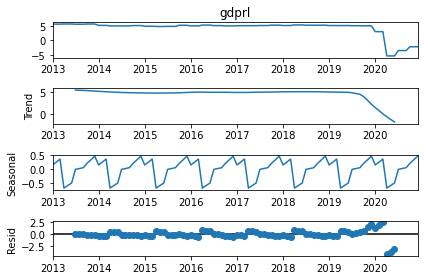

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data['gdprl'])
result.plot()
plt.show()

In [19]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [20]:
adf_test(data['gdprl'])

Augmented Dickey-Fuller Test: 
ADF test statistic      -0.848301
p-value                  0.804521
# lags used              0.000000
# observations          95.000000
critical value (1%)     -3.501137
critical value (5%)     -2.892480
critical value (10%)    -2.583275
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


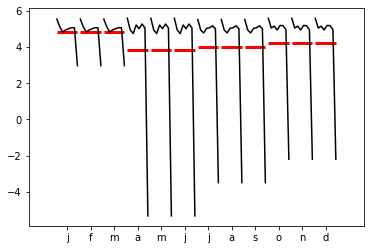

In [22]:
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
month_plot(data['gdprl']);

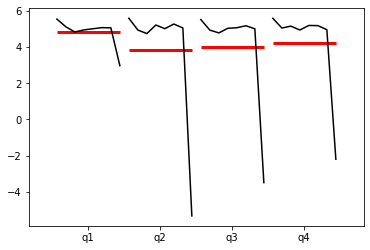

In [24]:
dfq = data['gdprl'].resample(rule='Q').mean()
quarter_plot(dfq);

In [30]:
len(data)

96

In [32]:
# Set one year for testing
train = data.iloc[:84]
test = data.iloc[84:]

In [42]:
traindata = data2.iloc[:84]
testdata = data2.iloc[84:]

In [43]:
traindata

,gdprl
period,
2013-01-01,5.540871
2013-02-01,5.540871
2013-03-01,5.540871
2013-04-01,5.588225
2013-05-01,5.588225
...,...
2019-08-01,5.006433
2019-09-01,5.006433
2019-10-01,4.957158


In [34]:
test

,barangbudaya,barangsandang,mobilsales,IKK,IKE,prod_motor,gdprl
period,,,,,,,
2020-01-01,-0.031542,-0.275407,-0.020936,-0.030189,-0.006677,0.059902,2.972174
2020-02-01,-0.167585,-0.404120,-0.026464,-0.059655,-0.035720,0.093897,2.972174
2020-03-01,-0.204642,-0.605201,-0.150020,-0.086444,-0.051623,-0.021818,2.972174
2020-04-01,-0.485254,-0.709049,-0.906396,-0.337830,-0.436164,-0.795189,-5.322250
2020-05-01,-0.537469,-0.740313,-0.957781,-0.392949,-0.552766,-0.975712,-5.322250
2020-06-01,-0.446364,-0.737026,-0.788205,-0.337131,-0.601145,-0.744427,-5.322250
2020-07-01,-0.386612,-0.664997,-0.716730,-0.309192,-0.544316,-0.795806,-3.485374
2020-08-01,-0.382490,-0.648505,-0.588409,-0.294300,-0.495781,-0.752865,-3.485374
2020-09-01,-0.395327,-0.597071,-0.478895,-0.315828,-0.496362,-0.507490,-3.485374


In [35]:
train

,barangbudaya,barangsandang,mobilsales,IKK,IKE,prod_motor,gdprl
period,,,,,,,
2013-01-01,-0.031166,0.034690,0.265155,-0.025030,-0.023058,0.284257,5.540871
2013-02-01,-0.061437,0.135979,0.194841,0.045366,0.059804,0.172939,5.540871
2013-03-01,-0.002762,0.143735,0.091677,0.088663,0.067323,0.051412,5.540871
2013-04-01,0.034129,0.237387,0.172967,0.106089,0.081794,0.213292,5.588225
2013-05-01,0.081693,0.243557,0.043133,0.034523,0.043888,0.107925,5.588225
...,...,...,...,...,...,...,...
2019-08-01,-0.108343,0.028394,-0.113790,0.012902,0.009448,0.007109,5.006433
2019-09-01,-0.097964,-0.098780,-0.001457,-0.004522,-0.024995,0.075440,5.006433
2019-10-01,-0.106444,-0.086248,-0.093807,-0.006734,-0.013322,-0.067386,4.957158


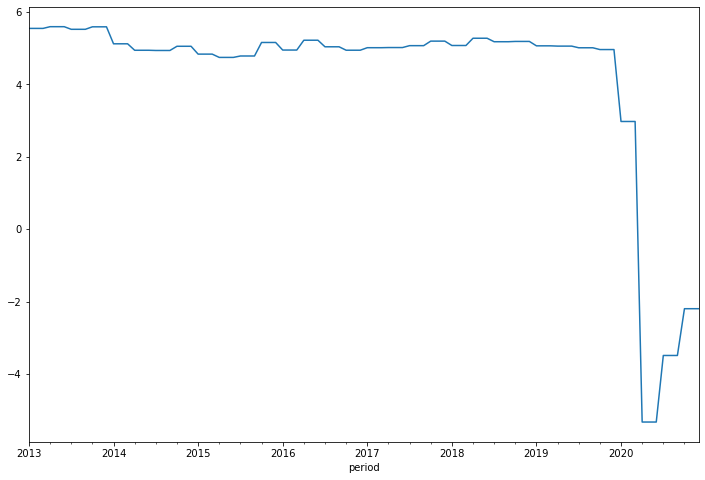

In [37]:
data['gdprl'].plot(figsize=(12,8));

# ExponentialSmoothing

In [38]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [44]:
fitted_model = ExponentialSmoothing(traindata, trend='add', seasonal='add',
                                   seasonal_periods= 12).fit()

In [46]:
test_predictions = fitted_model.forecast(12)
test_predictions

2020-01-01    4.779328
2020-02-01    4.779324
2020-03-01    4.779319
2020-04-01    4.814490
2020-05-01    4.814494
2020-06-01    4.814492
2020-07-01    4.770226
2020-08-01    4.770227
2020-09-01    4.770230
2020-10-01    4.848359
2020-11-01    4.848353
2020-12-01    4.848348
Freq: MS, dtype: float64

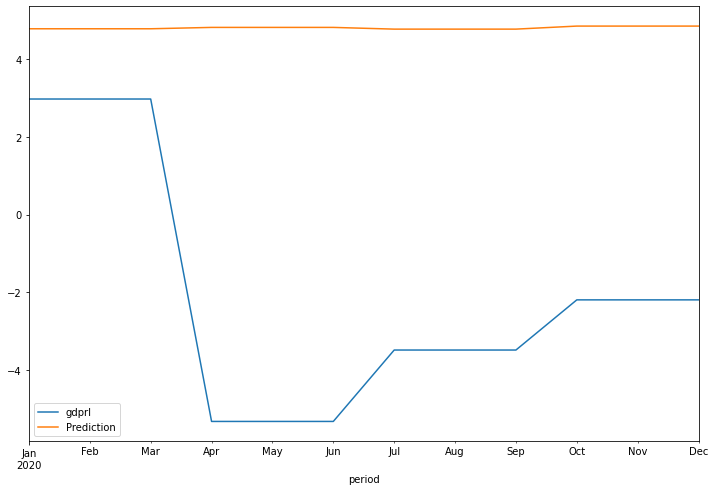

In [51]:
#traindata.plot(legend=True, label='Train', figsize=(12,8))
testdata.plot(legend=True, label='Test', figsize=(12,8))
test_predictions.plot(legend=True, label='Prediction')

In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
np.sqrt(mean_squared_error(testdata, test_predictions))

7.479636588406596

In [50]:
testdata.describe()

,gdprl
count,12.000000
mean,-2.007555
std,3.219426
min,-5.322250
25%,-3.944593
50%,-2.840071
75%,-0.903032
max,2.972174


In [52]:
# FORECASTING INTO FUTURE
final_model = ExponentialSmoothing(traindata, trend='add', seasonal='add',
                                   seasonal_periods= 12).fit()

In [53]:
forecast_predictions = final_model.forecast(36)

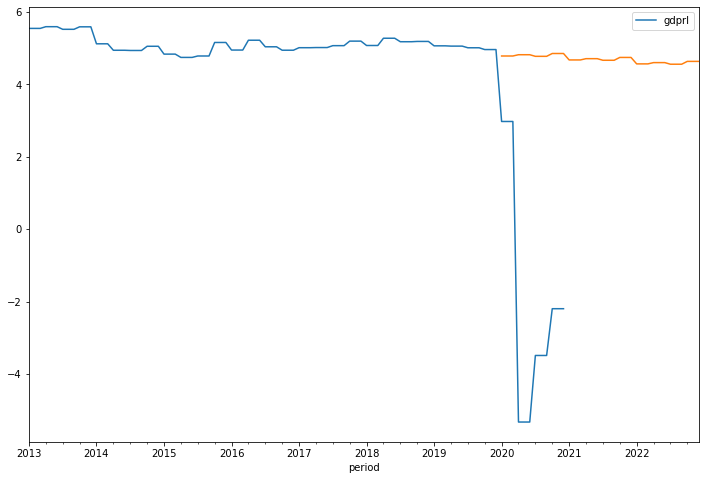

In [54]:
data2.plot(figsize=(12,8))
forecast_predictions.plot();

# ARIMA

In [57]:
from pmdarima import auto_arima
auto_arima(data['gdprl'],seasonal=True).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   96
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -125.747
Date:                Mon, 19 Apr 2021   AIC                            253.494
Time:                        21:57:21   BIC                            256.048
Sample:                             0   HQIC                           254.526
                                 - 96                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.8265      0.020     41.466      0.000       0.787       0.866
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             19664.59
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):             233.11   Skew:                            -7.81
Prob(H) (two-sided):                  0.00   Kurtosis:                        71.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Before First Difference

In [60]:
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
model = ARMA(traindata,order=(2,2))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  gdprl   No. Observations:                   84
Model:                     ARMA(2, 2)   Log Likelihood                  79.750
Method:                       css-mle   S.D. of innovations              0.093
Date:                Mon, 19 Apr 2021   AIC                           -147.501
Time:                        22:01:21   BIC                           -132.916
Sample:                    01-01-2013   HQIC                          -141.638
                         - 12-01-2019                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           5.1336      0.108     47.544      0.000       4.922       5.345
ar.L1.gdprl    -0.0878      0.054     -1.630      0.103      -0.193       0.018
ar.L2.gdprl     0.9114      0.050     18.071      0.000       0.813       1.010
ma.L1.gdprl     1.0440      0.116      8.996      0.000       0.817       1.271
ma.L2.gdprl     0.0440      0.116      0.379      0.705      -0.183       0.271
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0004           +0.0000j            1.0004            0.5000
AR.2            1.0968           +0.0000j            1.0968            0.0000
MA.1           -1.0000           +0.0000j            1.0000            0.5000
MA.2          -22.7439           +0.0000j           22.7439            0.5000
-----------------------------------------------------------------------------
"""

In [61]:
start=len(traindata)
end=len(traindata)+len(testdata)-1
predictions = results.predict(start=start, end=end).rename('ARMA(2,2) Predictions')

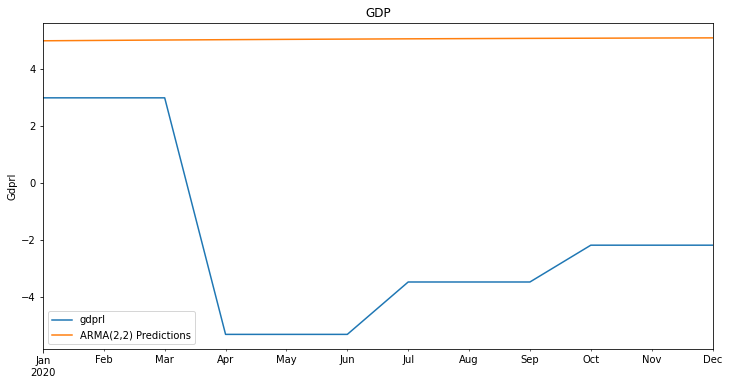

In [62]:
title = 'GDP'
ylabel='Gdprl'
xlabel='' # we don't really need a label here

ax = testdata.plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [65]:
stepwisefit = auto_arima(data['gdprl'], start_p=0, start_q=0,
                          max_p=2, max_q=2, m=12,
                          seasonal=False,
                          d=None, trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)           # set to stepwise

stepwisefit.summary()

Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=254.729, BIC=259.836, Time=0.059 seconds
Fit ARIMA(1,1,0)x(0,0,0,0) [intercept=True]; AIC=256.722, BIC=264.384, Time=0.045 seconds
Fit ARIMA(0,1,1)x(0,0,0,0) [intercept=True]; AIC=256.722, BIC=264.384, Time=0.039 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=False]; AIC=253.494, BIC=256.048, Time=0.018 seconds
Fit ARIMA(1,1,1)x(0,0,0,0) [intercept=True]; AIC=258.722, BIC=268.937, Time=0.155 seconds
Total fit time: 0.326 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   96
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -125.747
Date:                Mon, 19 Apr 2021   AIC                            253.494
Time:                        22:06:59   BIC                            256.048
Sample:                             0   HQIC                           254.526
                                 - 96                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.8265      0.020     41.466      0.000       0.787       0.866
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             19664.59
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):             233.11   Skew:                            -7.81
Prob(H) (two-sided):                  0.00   Kurtosis:                        71.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [66]:
model = ARIMA(traindata,order=(0,1,0))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.gdprl   No. Observations:                   83
Model:                 ARIMA(0, 1, 0)   Log Likelihood                  78.414
Method:                           css   S.D. of innovations              0.094
Date:                Mon, 19 Apr 2021   AIC                           -152.828
Time:                        22:07:37   BIC                           -147.990
Sample:                    02-01-2013   HQIC                          -150.885
                         - 12-01-2019                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0070      0.010     -0.681      0.496      -0.027       0.013
==============================================================================
"""

In [68]:
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('ARIMA(0,1,0) Predictions')

In [69]:
predictions

2020-01-01    4.950126
2020-02-01    4.943093
2020-03-01    4.936060
2020-04-01    4.929028
2020-05-01    4.921995
2020-06-01    4.914962
2020-07-01    4.907930
2020-08-01    4.900897
2020-09-01    4.893864
2020-10-01    4.886831
2020-11-01    4.879799
2020-12-01    4.872766
Freq: MS, Name: ARIMA(0,1,0) Predictions, dtype: float64

[Text(0, 0.5, 'gdprl'), Text(0.5, 0, '')]

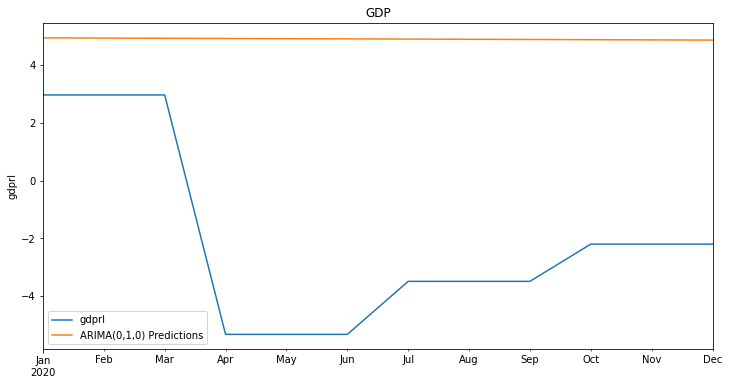

In [73]:
# Plot predictions against known values
title = 'GDP'
ylabel='gdprl'
xlabel='' # we don't really need a label here

ax = testdata.plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
#ax.yaxis.set_major_formatter(formatter);

In [75]:
from statsmodels.tsa.statespace.tools import diff
datafd = diff(data['gdprl'],k_diff=1)

# Equivalent to:
# df1['d1'] = df1['Inventories'] - df1['Inventories'].shift(1)

adf_test(datafd,'Real Manufacturing and Trade Inventories')

Augmented Dickey-Fuller Test: Real Manufacturing and Trade Inventories
ADF test statistic     -9.670390e+00
p-value                 1.281563e-16
# lags used             0.000000e+00
# observations          9.400000e+01
critical value (1%)    -3.501912e+00
critical value (5%)    -2.892815e+00
critical value (10%)   -2.583454e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [78]:
datafd

period
2013-02-01    0.000000
2013-03-01    0.000000
2013-04-01    0.047354
2013-05-01    0.000000
2013-06-01    0.000000
                ...   
2020-08-01    0.000000
2020-09-01    0.000000
2020-10-01    1.290607
2020-11-01    0.000000
2020-12-01    0.000000
Freq: MS, Name: gdprl, Length: 95, dtype: float64

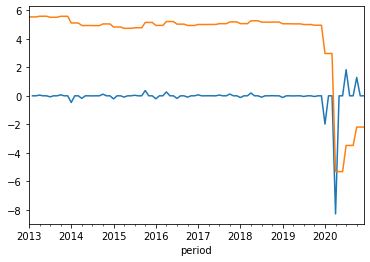

In [77]:
datafd.plot()
data['gdprl'].plot()

In [84]:
stepwise_fit = auto_arima(data['gdprl'], start_p=0, start_q=0,
                          max_p=6, max_q=6, m=12,
                          seasonal=True,
                          d=None, trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)           # set to stepwise

stepwise_fit.summary()

Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(1,1,1,12) [intercept=True]; AIC=237.684, BIC=247.360, Time=0.364 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=True]; AIC=234.328, BIC=239.165, Time=0.071 seconds
Fit ARIMA(1,1,0)x(1,1,0,12) [intercept=True]; AIC=238.217, BIC=247.892, Time=0.251 seconds
Fit ARIMA(0,1,1)x(0,1,1,12) [intercept=True]; AIC=238.167, BIC=247.843, Time=0.290 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=False]; AIC=232.906, BIC=235.325, Time=0.023 seconds
Fit ARIMA(0,1,0)x(1,1,0,12) [intercept=True]; AIC=236.221, BIC=243.477, Time=0.149 seconds
Fit ARIMA(0,1,0)x(0,1,1,12) [intercept=True]; AIC=236.171, BIC=243.428, Time=0.193 seconds
Fit ARIMA(1,1,0)x(0,1,0,12) [intercept=True]; AIC=236.324, BIC=243.580, Time=0.092 seconds
Fit ARIMA(0,1,1)x(0,1,0,12) [intercept=True]; AIC=236.324, BIC=243.580, Time=0.139 seconds
Fit ARIMA(1,1,1)x(0,1,0,12) [intercept=True]; AIC=238.324, BIC=247.999, Time=0.151 seconds
Total fit time: 1.766 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   96
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -115.453
Date:                            Mon, 19 Apr 2021   AIC                            232.906
Time:                                    22:53:14   BIC                            235.325
Sample:                                         0   HQIC                           233.878
                                             - 96                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.9456      0.026     36.130      0.000       0.894       0.997
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             12904.50
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):             236.20   Skew:                            -7.25
Prob(H) (two-sided):                  0.00   Kurtosis:                        62.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [86]:
stepwise_fit = auto_arima(data2, m=12,
                          seasonal=True,
                          d=None, trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)           # set to stepwise

stepwise_fit.summary()

Performing stepwise search to minimize aic
Fit ARIMA(2,1,2)x(1,1,1,12) [intercept=True]; AIC=244.641, BIC=263.991, Time=2.173 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=True]; AIC=234.328, BIC=239.165, Time=0.067 seconds
Fit ARIMA(1,1,0)x(1,1,0,12) [intercept=True]; AIC=238.217, BIC=247.892, Time=0.245 seconds
Fit ARIMA(0,1,1)x(0,1,1,12) [intercept=True]; AIC=238.167, BIC=247.843, Time=0.277 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=False]; AIC=232.906, BIC=235.325, Time=0.030 seconds
Fit ARIMA(0,1,0)x(1,1,0,12) [intercept=True]; AIC=236.221, BIC=243.477, Time=0.166 seconds
Fit ARIMA(0,1,0)x(0,1,1,12) [intercept=True]; AIC=236.171, BIC=243.428, Time=0.191 seconds
Fit ARIMA(0,1,0)x(1,1,1,12) [intercept=True]; AIC=237.684, BIC=247.360, Time=0.457 seconds
Fit ARIMA(1,1,0)x(0,1,0,12) [intercept=True]; AIC=236.324, BIC=243.580, Time=0.047 seconds
Fit ARIMA(0,1,1)x(0,1,0,12) [intercept=True]; AIC=236.324, BIC=243.580, Time=0.069 seconds
Fit ARIMA(1,1,1)x(0,1,0,12) [intercept=True]; 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   96
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -115.453
Date:                            Mon, 19 Apr 2021   AIC                            232.906
Time:                                    22:54:14   BIC                            235.325
Sample:                                         0   HQIC                           233.878
                                             - 96                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.9456      0.026     36.130      0.000       0.894       0.997
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             12904.50
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):             236.20   Skew:                            -7.25
Prob(H) (two-sided):                  0.00   Kurtosis:                        62.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [87]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [94]:
model = SARIMAX(traindata, order=(1,1,1), seasonal_order=(0,1,0,12),
               enforce_invertibility=False)

In [95]:
results = model.fit()

In [96]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               gdprl   No. Observations:                   84
Model:             SARIMAX(1, 1, 1)x(0, 1, [], 12)   Log Likelihood                  50.346
Date:                             Mon, 19 Apr 2021   AIC                            -94.692
Time:                                     23:01:23   BIC                            -87.904
Sample:                                 01-01-2013   HQIC                           -91.993
                                      - 12-01-2019                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1       3.054e-08   3.21e-13    9.5e+04      0.000    3.05e-08    3.05e-08
ma.L1      -3.067e-08   3.21e-13  -9.54e+04      0.000   -3.07e-08   -3.07e-08
sigma2         0.0142      0.001     10.344      0.000       0.011       0.017
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                50.05
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.32
Prob(H) (two-sided):                  0.61   Kurtosis:                         7.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [99]:
predictions = results.predict(start,end).rename('SARIMA Model')
predictions

2020-01-01    4.835609
2020-02-01    4.835609
2020-03-01    4.835609
2020-04-01    4.827993
2020-05-01    4.827993
2020-06-01    4.827993
2020-07-01    4.782278
2020-08-01    4.782278
2020-09-01    4.782278
2020-10-01    4.733003
2020-11-01    4.733003
2020-12-01    4.733003
Freq: MS, Name: SARIMA Model, dtype: float64

In [100]:
testdata

,gdprl
period,
2020-01-01,2.972174
2020-02-01,2.972174
2020-03-01,2.972174
2020-04-01,-5.322250
2020-05-01,-5.322250
2020-06-01,-5.322250
2020-07-01,-3.485374
2020-08-01,-3.485374
2020-09-01,-3.485374


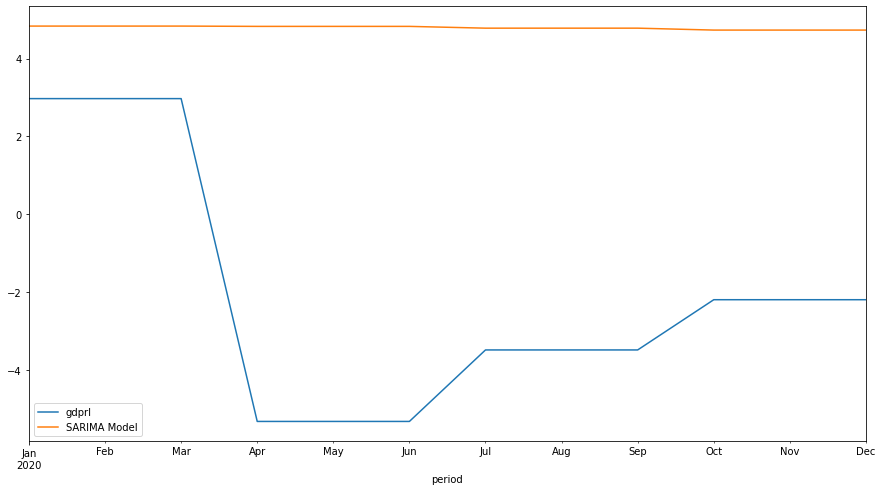

In [98]:
testdata.plot(legend=True, figsize=(15,8))
predictions.plot(legend=True)

In [101]:
from fbprophet import Prophet

In [110]:
data2 = data2.drop(columns=['index','level_0'])
data2

,period,gdprl
0,2013-01-01,5.540871
1,2013-02-01,5.540871
2,2013-03-01,5.540871
3,2013-04-01,5.588225
4,2013-05-01,5.588225
...,...,...
91,2020-08-01,-3.485374
92,2020-09-01,-3.485374
93,2020-10-01,-2.194768
94,2020-11-01,-2.194768


In [112]:
data2.columns = ['ds','y']
data2.head()

,ds,y
0,2013-01-01,5.540871
1,2013-02-01,5.540871
2,2013-03-01,5.540871
3,2013-04-01,5.588225
4,2013-05-01,5.588225


In [134]:
m = Prophet()
m.fit(data2)

15795251 DEBUG: Trying to load backend: PYSTAN
15795259 DEBUG: Unable to load backend PYSTAN (No module named 'pystan'), trying the next one
15795260 DEBUG: Trying to load backend: CMDSTANPY
15795287 DEBUG: Unable to load backend CMDSTANPY (module 'cmdstanpy' has no attribute 'Model'), trying the next one


AttributeError: 'Prophet' object has no attribute 'stan_backend'

In [129]:
hiddenimports = ['stan_backend']
hiddenimports = Prophet()

15135290 DEBUG: Trying to load backend: PYSTAN
15135297 DEBUG: Unable to load backend PYSTAN (No module named 'pystan'), trying the next one
15135298 DEBUG: Trying to load backend: CMDSTANPY
15135301 DEBUG: Unable to load backend CMDSTANPY (No module named 'cmdstanpy'), trying the next one


AttributeError: 'Prophet' object has no attribute 'stan_backend'

In [137]:
from fbprophet import Prophet
import logging
logger = logging.getLogger('fbprophet')
logger.setLevel(logging.DEBUG)

m = Prophet()
print(m.stan_backend)

15840557 DEBUG: Trying to load backend: PYSTAN
15840562 DEBUG: Unable to load backend PYSTAN (No module named 'pystan'), trying the next one
15840563 DEBUG: Trying to load backend: CMDSTANPY
15840564 DEBUG: Unable to load backend CMDSTANPY (module 'cmdstanpy' has no attribute 'Model'), trying the next one


AttributeError: 'Prophet' object has no attribute 'stan_backend'

In [3]:
import sys
sys.version_info

sys.version_info(major=3, minor=8, micro=5, releaselevel='final', serial=0)